In [58]:
import os
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt

In [43]:
class CityData:
    def __init__(self, text: list[str]):
        self.region = None
        self.uf = None
        self.station = None
        self.code = None
        self.latitude = None
        self.longitude = None
        self.altitude = None
        self.data_fundacao = None

        self.parse_text(text)
        self.time_series = self.parse_time_series(text)

    def sanitize_value(self, value: str):
        return value.split(';')[1].strip()

    def parse_text(self, text: list[str]):
        self.region = self.sanitize_value(text[0])
        self.uf = self.sanitize_value(text[1])
        self.station = self.sanitize_value(text[2])
        self.code = self.sanitize_value(text[3])
        self.latitude = self.sanitize_value(text[4])
        self.longitude = self.sanitize_value(text[5])
        self.altitude = self.sanitize_value(text[6])
        self.data_fundacao = self.sanitize_value(text[7])

    def parse_time_series(self, text: list[str]):
        header = [col for col in text[8].split(';') if col != '\n']
        mapping = {col.strip(): [] for col in header}
        for line in text[9:]:
            for idx, item in enumerate(line.split(';')):
                if item != '\n':
                    item = item.strip()
                    item = item.replace(',','.')
                    if idx >= 2 and ',' :
                        if item != "":
                            item = float(item)
                        else:
                            item = None
                    mapping[header[idx]].append(item)

        
        return pd.DataFrame(mapping)


    def get_temperature_series(self):
        self.temperature_series = self.time_series['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].copy()
        self.temperature_series.fillna(self.temperature_series.mean(),inplace=True)

In [44]:
data: list[CityData] = []
files = os.listdir('./data')
for file in files:
    print(file)
    with open(os.path.join('./data', file), 'r', encoding='latin1') as f:
        data.append(CityData(f.readlines()))

INMET_SE_SP_A738_CASA BRANCA_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A748_BARRETOS_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A706_CAMPOS DO JORDAO_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A765_BERTIOGA_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A771_SAO PAULO - INTERLAGOS_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A746_BARRA DO TURVO_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A739_ITAPIRA_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A768_TUPA_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A735_JOSE BONIFACIO_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A747_PRADOPOLIS_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A725_AVARE_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A741_BARRA BONITA_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A762_DRACENA_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A728_TAUBATE_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A744_BRAGANCA PAULISTA_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A715_SAO MIGUEL ARCANJO_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A726_PIRACICABA_01-01-2022_A_31-12-2022.CSV
INMET_SE_SP_A737_IBITINGA_01

Para simplificar, vamos trabalhar apenas com uma série temporal de cada cidade. Tomaremos a temperatura máxima na hora anterior.


In [45]:
def get_all_temperature_series(data):
    for city in data:
        city.get_temperature_series()

get_all_temperature_series(data)

In [73]:
graph = nx.Graph()

graph.add_nodes_from(city.station for city in data)

In [74]:
# for cidade_origem in cidades:
#     for cidade_destino in cidades:
#         if cidade_origem != cidade_destino:
#             correlacao = calcular_correlacao(eval(cidade_origem + '_data')['valor'], eval(cidade_destino + '_data')['valor'])
#             grafo.add_edge(cidade_origem, cidade_destino, weight=correlacao)

for city1 in data:
    for city2 in data:
        if city1 != city2:
            correlation = np.corrcoef(city1.temperature_series, city2.temperature_series)
            print(correlation[0][1]) # por algum motivo o resultado era uma matriz
            graph.add_edge(city1.station, city2.station, weight=correlation[0][1])

0.5170179418958505
0.8424225357817913
0.6760290204447892
0.7690338115566406
0.6575705571667662
0.7508361580074926
0.8548554849078582
0.8913785246544582
0.9232567023295194
0.7384101650038416
0.8676741339500562
0.8543368318631733
0.8541223233978782
0.885751129734508
0.6200308737306419
0.8545294448982247
0.9172162370633139
0.7664678447855564
0.939113030556157
0.6288721111833957
0.8844070460433245
0.8901993322706837
0.8639839195004995
0.8312874324945924
0.7114423254934754
0.7457812952948447
0.8770252664227663
0.8580919158587129
0.7294237890164298
0.6338066188259678
0.5809075514179128
0.8332937025020858
0.8404188187637768
0.7294703449241641
0.7790325720329566
0.8041772532548668
0.6287007786063192
0.5170179418958505
0.3995175183579365
0.34039327341731423
0.4089079204987284
0.23457899455316633
0.4563561471503948
0.46408963707186673
0.48835361989729675
0.5120288369704713
0.4279904376171504
0.4702806201901141
0.4513048035526464
0.44950275502923787
0.4210611744901258
0.28899760095233085
0.334215

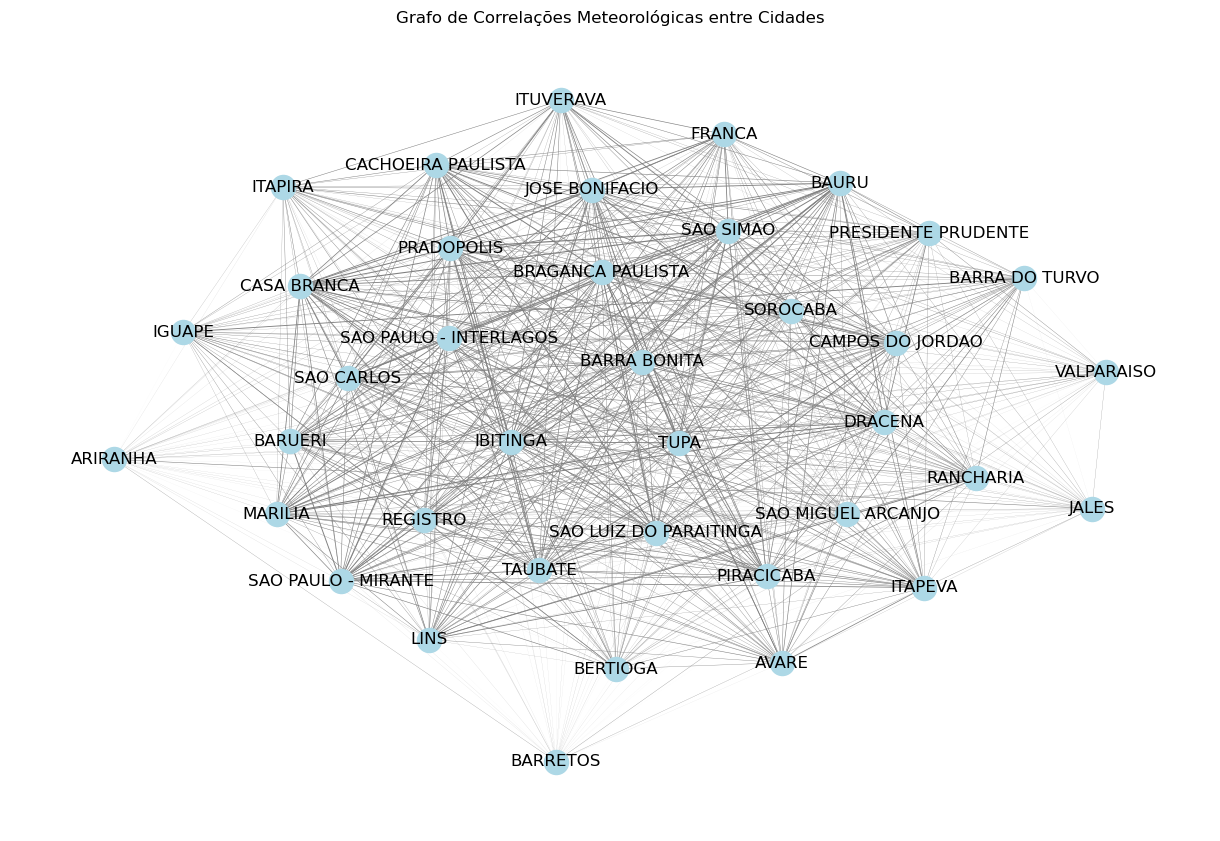

In [92]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph)
weights = [graph.get_edge_data(u,v)['weight'] for u,v in graph.edges()]
weights = [weight**4 for weight in weights]
edge_labels = {(u, v): f'{w:.2f}' for u, v, w in graph.edges(data='weight')}
nx.draw(graph, pos, with_labels=True, node_color='lightblue', width=weights, edge_color='gray')
# nx.draw_networkx_edge_labels(graph,pos,edge_labels=edge_labels)
plt.title("Grafo de Correlações Meteorológicas entre Cidades")
plt.show()

In [ ]:
for i, city in enumerate(data):
    for other_city in data[i + 1:]:
        print(np.corrcoef(city.temperature_series, other_city.temperature_series))